# 1. Install & Import Required Libraries

In [1]:
! python -m spacy download en_core_web_sm 

     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     - -------------------------------------- 0.5/12.8 MB 2.4 MB/s eta 0:00:06
     --- ------------------------------------ 1.0/12.8 MB 2.6 MB/s eta 0:00:05
     ----- ---------------------------------- 1.8/12.8 MB 2.9 MB/s eta 0:00:04
     ------- -------------------------------- 2.4/12.8 MB 3.0 MB/s eta 0:00:04
     ---------- ----------------------------- 3.4/12.8 MB 3.3 MB/s eta 0:00:03
     ------------ --------------------------- 3.9/12.8 MB 3.3 MB/s eta 0:00:03
     --------------- ------------------------ 5.0/12.8 MB 3.6 MB/s eta 0:00:03
     ------------------ --------------------- 6.0/12.8 MB 3.8 MB/s eta 0:00:02
     ---------------------- ----------------- 7.1/12.8 MB 3.9 MB/s eta 0:00:02
     -------------------------- ------------- 8.4/12.8 MB 4.2 MB/s eta 0:00:02
     ------------------------------ --------- 9.7/12.8 MB 4.4 MB/s

In [2]:
# English language model en_core_web_sm used by spaCy for: Tokenization, POS tagging, Lemmatization and Named Entity Recognition (NER)
#! python -m spacy download en_core_web_sm 
#! pip install scikit-learn
#!pip install textblob
# %pip install torch
# %pip install transformers
# %pip install wordcloud
# %pip install transformers umap-learn 

# Standard libraries
import os
import io
from tqdm import tqdm
from tqdm.auto import tqdm
import joblib
import dill
from __future__ import annotations
from pathlib import Path
from typing import List
import torch
from torch.utils.data import DataLoader, Dataset

# Data manipulation
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# machine learning
import sklearn

# NLP
import re
import string
import nltk
from nltk import pos_tag
from nltk import word_tokenize
from nltk.corpus import stopwords, wordnet
from nltk.stem import WordNetLemmatizer
# from textblob import TextBlob
from collections import Counter
import spacy
from spacy.tokens import Doc
from sklearn.feature_extraction.text import TfidfVectorizer
from transformers import AutoModel, AutoTokenizer

# Download required resources
nltk.download('stopwords') # for stopword lists
nltk.download('punkt',  force=True)
nltk.download('punkt_tab')
nltk.download('averaged_perceptron_tagger_eng')
nltk.download('wordnet') # for lemmatization
nltk.download('averaged_perceptron_tagger') # for POS tagging
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to C:\Users\Sheng
[nltk_data]     Miao\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\Sheng
[nltk_data]     Miao\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package punkt_tab to C:\Users\Sheng
[nltk_data]     Miao\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     C:\Users\Sheng Miao\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to C:\Users\Sheng
[nltk_data]     Miao\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Sheng Miao\AppData\Roaming\nltk_data...
[nlt

True

# 2. Load Data

Define the Table and Load into DataFrame

In [3]:
path = "../data/10kPatients_cohort_full_features_2025_08_22_0228.csv"

df = pd.read_csv(path)

In [4]:
df['readmit_30days'].value_counts()

readmit_30days
0    8768
1    1421
Name: count, dtype: int64

In [5]:
pd.set_option('display.max_columns', None)

print(df.columns.tolist())  # shows all column names as a list

['row_grain', 'grain_id', 'subject_id', 'hadm_id', 'admittime', 'dischtime', 'admission_type', 'admission_location', 'discharge_location', 'insurance', 'language', 'marital_status', 'race', 'note_id', 'note_text', 'rn', 'next_hadm_id', 'next_admittime', 'next_admission_type', 'days_to_next_admit', 'readmit_30days', 'icu_stay_count', 'dx_count', 'dx_code_uniq', 'dx_root3_uniq', 'proc_count', 'proc_code_uniq', 'proc_root3_uniq', 'cci_mi', 'cci_chf', 'cci_pvd', 'cci_cevd', 'cci_dementia', 'cci_copd', 'cci_rheum', 'cci_pud', 'cci_mild_liver', 'cci_diabetes_wo_comp', 'cci_diabetes_w_comp', 'cci_hemiplegia', 'cci_renal', 'cci_any_cancer', 'cci_metastatic_solid', 'cci_severe_liver', 'cci_aids', 'cci_score', 'ex_congestive_heart_failure', 'ex_cardiac_arrhythmias', 'ex_valvular_disease', 'ex_pulmonary_circulation', 'ex_peripheral_vascular_disorders', 'ex_hypertension_uncomplicated', 'ex_hypertension_complicated', 'ex_paralysis', 'ex_other_neurological', 'ex_chronic_pulmonary', 'ex_diabetes_unco

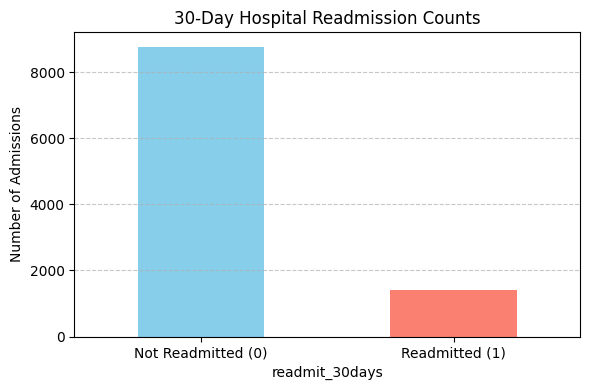

In [6]:
# Count the values
counts = df['readmit_30days'].value_counts().sort_index()

# Plot
plt.figure(figsize=(6, 4))
counts.plot(kind='bar', color=['skyblue', 'salmon'])

# Labels and title
plt.xticks(ticks=[0, 1], labels=['Not Readmitted (0)', 'Readmitted (1)'], rotation=0)
plt.ylabel('Number of Admissions')
plt.title('30-Day Hospital Readmission Counts')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()

In [7]:
print(len(df))

10189


In [8]:
df.shape

(10189, 125)

# 3. Data cleaning / typing

## 3.1 Duration Feature Generation

In [9]:
# Ensure datetime dtypes (force a consistent tz to avoid mixed types)
date_cols = ['admittime','dischtime','icu_intime','icu_outtime']
df.loc[:, date_cols] = df[date_cols].apply(
    lambda s: pd.to_datetime(s, errors='coerce', utc=True)
)

# 2) Compute Timedelta
df['length_of_icu_stay'] = df['icu_outtime'] - df['icu_intime']
df['admit_to_disch'] = df['dischtime'] - df['admittime']

# 3) Hours (no .dt needed)
df['length_of_icu_stay_hours'] = df['length_of_icu_stay'] / pd.Timedelta(hours=1)
df['admit_to_disch_hours'] = df['admit_to_disch'] / pd.Timedelta(hours=1)

# cleanups
df.loc[df['length_of_icu_stay_hours'] < 0, 'length_of_icu_stay_hours'] = np.nan  # bad clocks
df.loc[df['admit_to_disch_hours'] < 0, 'admit_to_disch_hours'] = np.nan  # bad clocks

In [10]:
print(df['length_of_icu_stay_hours'].isna().sum())
print(df['admit_to_disch_hours'].isna().sum())

7729
0


Plot distribution

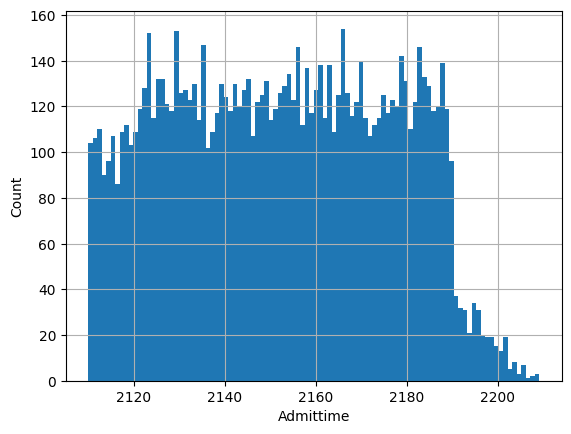

In [11]:
df.admittime.hist(bins=100)
plt.xlabel('Admittime')
plt.ylabel('Count')
plt.show()

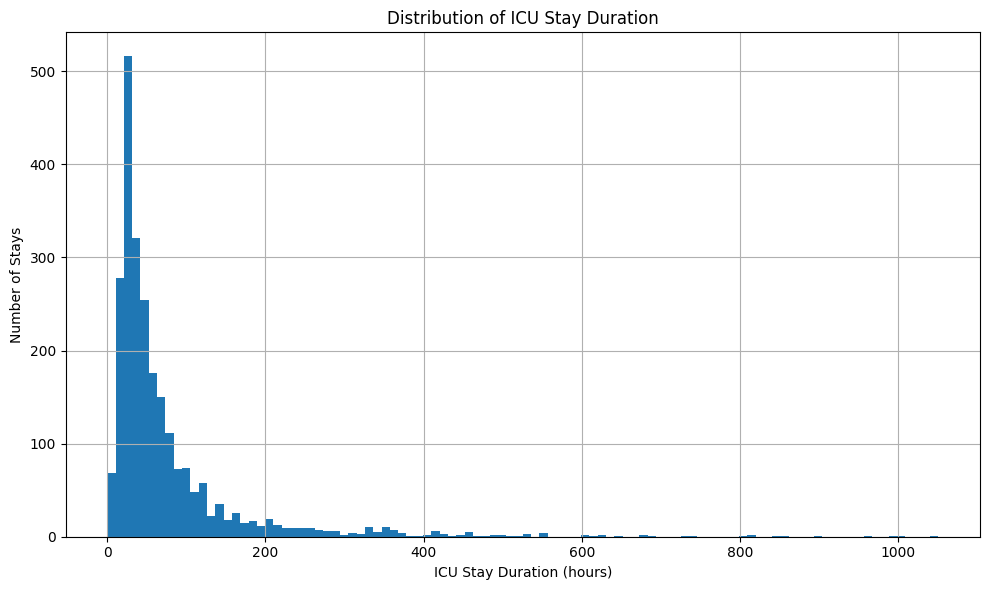

In [12]:
# Convert timedelta to hours (or use .dt.days for days)

plt.figure(figsize=(10, 6))
df['length_of_icu_stay_hours'].hist(bins=100)
plt.xlabel('ICU Stay Duration (hours)')
plt.ylabel('Number of Stays')
plt.title('Distribution of ICU Stay Duration')
plt.tight_layout()
plt.show()


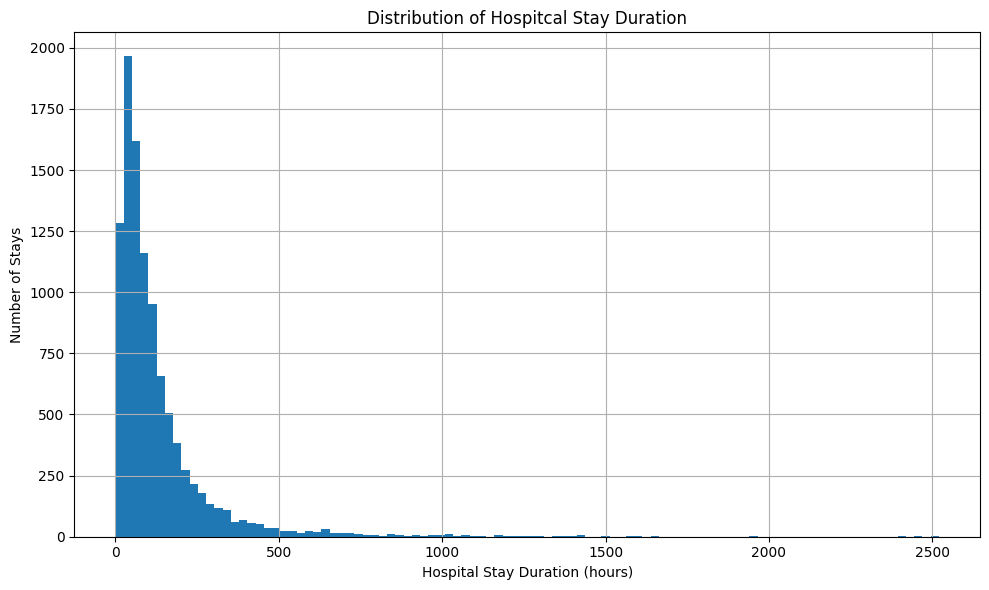

In [13]:
# Convert timedelta to hours (or use .dt.days for days)
plt.figure(figsize=(10, 6))
df['admit_to_disch_hours'].hist(bins=100)
plt.xlabel('Hospital Stay Duration (hours)')
plt.ylabel('Number of Stays')
plt.title('Distribution of Hospitcal Stay Duration')
plt.tight_layout()
plt.show()

These plots show that the majority of hospital and ICU stays are relatively short, with most ICU stays lasting under 200 hours (~8 days) and hospital stays under 500 hours (~20 days). Both distributions are highly right-skewed, indicating that a small number of patients experienced significantly longer stays. The frequency drops sharply as the duration increases, with a few outliers extending well beyond 1,000 hours.

In [14]:
missing_tbl = (
    df.isna().sum()
      .to_frame('n_missing')
      .assign(pct_missing=lambda x: x['n_missing'] / len(df))
      .query('n_missing > 0')
      .sort_values('n_missing', ascending=False)
)
print(missing_tbl)


                                  n_missing  pct_missing
sbp_art_mean                           9081     0.891255
dbp_art_mean                           9079     0.891059
map_art_mean                           9072     0.890372
ex_peripheral_vascular_disorders       8620     0.846010
ex_cardiac_arrhythmias                 8620     0.846010
...                                     ...          ...
insurance                               207     0.020316
language                                 25     0.002454
dx_count                                  3     0.000294
dx_code_uniq                              3     0.000294
dx_root3_uniq                             3     0.000294

[111 rows x 2 columns]


## 3.2 Collapses multiple ICU stays per admission (hadm_id) into one row

In [15]:
# Count how many rows per subject
row_counts = df['subject_id'].value_counts()

# Subjects with only 1 row
subjects_with_1r = row_counts[row_counts == 1]
# Subjects with 2 rows
subjects_with_2r = row_counts[row_counts == 2]
# Subjects with 3 or more rows
subjects_with_3plusr = row_counts[row_counts >= 3]

print(f"Subjects with only 1 row: {len(subjects_with_1r)}")
print(f"Subjects with 2 rows: {len(subjects_with_2r)}")
print(f"Subjects with 3+ rows: {len(subjects_with_3plusr)}")

Subjects with only 1 row: 9828
Subjects with 2 rows: 157
Subjects with 3+ rows: 15


In [16]:
# Make sure only one note for each patient
# Count number of unique hadm_ids per subject_id
note_counts = df.groupby('subject_id')['note_id'].nunique()
note_multi = note_counts[note_counts > 1].index.tolist()
print(note_multi)
print(len(note_multi))

[]
0


In [17]:
# Make sure only one note for each patient
# Count number of unique hadm_ids per subject_id
icu_counts = df.groupby('subject_id')['icu_stay_id'].nunique()
icu_multi = icu_counts[icu_counts > 1].index.tolist()
print(icu_multi)
print(len(icu_multi))

[10020740, 10029291, 10034317, 10063848, 10089085, 10100037, 10100435, 10104730, 10110133, 10110863, 10123036, 10131647, 10132888, 10145374, 10176458, 10180134, 10193074, 10206502, 10206723, 10209126, 10209410, 10213275, 10219697, 10227155, 10233597, 10244629, 10246901, 10247095, 10250582, 10258162, 10264113, 10268465, 10275937, 10284532, 10298894, 10300586, 10302157, 10304339, 10306162, 10308297, 10313200, 10319938, 10350488, 10358380, 10373447, 10388400, 10390732, 10395553, 10411115, 10417530, 10427193, 10431886, 10431934, 10438253, 10463621, 10471192, 10481582, 10488906, 10495665, 10504004, 10507163, 10515638, 10526134, 10537484, 10541842, 10552915, 10556676, 10569076, 10575383, 10582595, 10597337, 10606965, 10613188, 10623984, 10624561, 10634251, 10643827, 10644961, 10656173, 10658571, 10679181, 10691194, 10693162, 10703777, 10709195, 10710573, 10723263, 10724174, 10725525, 10760122, 10773491, 10781714, 10806973, 10813367, 10819468, 10830347, 10835819, 10839821, 10840912, 10845634,

In [18]:
# 1) Sample this patient's rows (use .copy()!)
patient_sample = df.loc[df['subject_id'] == 10020740, :].copy()

# 2) Drop columns that are identical across all of this patient’s rows
#    (treats NaN as a value; all-NaN columns are dropped too)
const_mask = patient_sample.nunique(dropna=False) <= 1
patient_var = patient_sample.loc[:, ~const_mask]

# (optional) see what got dropped
dropped_cols = patient_sample.columns[const_mask].tolist()
print("Dropped constant columns:", dropped_cols)

patient_var

Dropped constant columns: ['row_grain', 'subject_id', 'hadm_id', 'admittime', 'dischtime', 'admission_type', 'admission_location', 'discharge_location', 'insurance', 'language', 'marital_status', 'race', 'note_id', 'note_text', 'rn', 'next_hadm_id', 'next_admittime', 'next_admission_type', 'days_to_next_admit', 'readmit_30days', 'icu_stay_count', 'dx_count', 'dx_code_uniq', 'dx_root3_uniq', 'proc_count', 'proc_code_uniq', 'proc_root3_uniq', 'cci_mi', 'cci_chf', 'cci_pvd', 'cci_cevd', 'cci_dementia', 'cci_copd', 'cci_rheum', 'cci_pud', 'cci_mild_liver', 'cci_diabetes_wo_comp', 'cci_diabetes_w_comp', 'cci_hemiplegia', 'cci_renal', 'cci_any_cancer', 'cci_metastatic_solid', 'cci_severe_liver', 'cci_aids', 'cci_score', 'ex_congestive_heart_failure', 'ex_cardiac_arrhythmias', 'ex_valvular_disease', 'ex_pulmonary_circulation', 'ex_peripheral_vascular_disorders', 'ex_hypertension_uncomplicated', 'ex_hypertension_complicated', 'ex_paralysis', 'ex_other_neurological', 'ex_chronic_pulmonary', 'ex

,grain_id,icu_stay_id,icu_intime,icu_outtime,hr_mean,rr_mean,spo2_mean,temp_c_mean,map_mean_pref,map_ni_mean,sbp_ni_mean,dbp_ni_mean,length_of_icu_stay,length_of_icu_stay_hours
3218,35044342,35044342.0,2150-03-19 04:41:33+00:00,2150-03-23 20:49:33+00:00,102.163636,29.110092,95.936364,37.011905,84.730769,84.730769,131.278846,70.644231,4 days 16:08:00,112.133333
3310,35026312,35026312.0,2150-03-11 15:34:56+00:00,2150-03-19 02:17:47+00:00,86.994536,21.837989,96.653179,36.951537,77.460674,77.460674,122.325843,64.359551,7 days 10:42:51,178.714167
3314,35889503,35889503.0,2150-03-25 18:22:56+00:00,2150-03-28 22:20:47+00:00,105.935065,28.272727,97.324675,37.446860,84.184211,84.184211,128.460526,70.934211,3 days 03:57:51,75.964167
3497,31077365,31077365.0,2150-03-30 07:57:10+00:00,2150-04-04 10:58:43+00:00,98.925926,22.296296,97.490683,37.259857,81.360902,81.360902,123.466165,69.383459,5 days 03:01:33,123.025833


In [19]:
# Count how many admissions per subject
admit_counts = df.groupby('subject_id')['hadm_id'].nunique()
subjects_with_1 = admit_counts[admit_counts == 1]
subjects_with_2 = admit_counts[admit_counts == 2]
subjects_with_3plus = admit_counts[admit_counts >= 3]

print(f"Subjects with only 1 admission: {len(subjects_with_1)}")
print(f"Subjects with 2 admissions: {len(subjects_with_2)}")
print(f"Subjects with 3+ admissions: {len(subjects_with_3plus)}")


Subjects with only 1 admission: 10000
Subjects with 2 admissions: 0
Subjects with 3+ admissions: 0


This counts the number of rows per subject_id doesn't equal to the number of distinct hospital admissions (hadm_id). The count of subjects with only 1 admission (8732) is more than that of subjects with only 1 row (8615)，indicating that few subject with only one admission have two rows, which could be due to more than one icu_id at same hadm_id.

In [20]:
# Make sure only one admission was selected for each patient
# Count number of unique hadm_ids per subject_id
hadm_counts = df.groupby('subject_id')['hadm_id'].nunique()
subjects_multi = hadm_counts[hadm_counts > 1].index.tolist()
print(subjects_multi)
print(len(subjects_multi))

[]
0


drop-in block that collapses multiple ICU stays per admission (hadm_id) into one row with:

- icu_stay_count, total_icu_hours
- duration-weighted means for vitals
- min/max vitals (“worst” physiology)
- timing: time_to_first_icu_hours, last_icu_to_discharge_hours
- all other structured columns carried forward (first value per admission)

In [21]:
# # ---- configure vital columns want to aggregate
# vital_cols = [
#     'hr_mean','rr_mean','spo2_mean','temp_c_mean',
#     'map_mean_pref','map_ni_mean','sbp_ni_mean','dbp_ni_mean'
# ]

# # ICU-varying columns (we aggregate these per admission)
# icu_vary_cols = set([
#     'icu_stay_id','icu_intime','icu_outtime',
#     'length_of_icu_stay','length_of_icu_stay_hours'
# ] + vital_cols)

# # --- hygiene: ensure datetimes and LOS hours exist
# df = df.copy()
# for c in ['admittime','dischtime','icu_intime','icu_outtime']:
#     if c in df.columns:
#         df[c] = pd.to_datetime(df[c], errors='coerce', utc=True)

# if 'length_of_icu_stay_hours' not in df.columns and {'icu_intime','icu_outtime'}.issubset(df.columns):
#     df['length_of_icu_stay'] = df['icu_outtime'] - df['icu_intime']
#     df['length_of_icu_stay_hours'] = df['length_of_icu_stay'] / pd.Timedelta(hours=1)

# # --- 1) constant structured columns (EXCLUDE hadm_id and any columns we will recompute)
# drop_if_present = {
#     'hadm_id',                    # will be the index
#     'icu_stay_count',             # recomputed
#     'total_icu_hours',            # recomputed
#     'first_icu_intime','last_icu_outtime',  # recomputed
#     'time_to_first_icu_hours','last_icu_to_discharge_hours'
# }

# const_cols = [c for c in df.columns
#               if c not in icu_vary_cols and c not in drop_if_present]

# const_per_adm = df.groupby('hadm_id', as_index=True)[const_cols].first()

# # --- 2) ICU aggregates per admission
# g = df.groupby('hadm_id', as_index=True)

# icu_agg = pd.DataFrame({
#     'icu_stay_count': g['icu_stay_id'].nunique(dropna=True) if 'icu_stay_id' in df else 0,
#     'total_icu_hours': g['length_of_icu_stay_hours'].sum(min_count=1)
# })

# if {'icu_intime','icu_outtime'}.issubset(df.columns):
#     icu_agg['first_icu_intime'] = g['icu_intime'].min()
#     icu_agg['last_icu_outtime'] = g['icu_outtime'].max()
# else:
#     icu_agg['first_icu_intime'] = pd.NaT
#     icu_agg['last_icu_outtime'] = pd.NaT

# def wavg(group, col, wcol='length_of_icu_stay_hours'):
#     s = group[[col, wcol]].dropna()
#     if s.empty or s[wcol].sum() <= 0:
#         return np.nan
#     return np.average(s[col], weights=s[wcol])

# present_vitals = [c for c in vital_cols if c in df.columns]
# for col in present_vitals:
#     icu_agg[f'{col}_wmean'] = g.apply(lambda x, c=col: wavg(x, c))
#     icu_agg[f'{col}_min']   = g[col].min()
#     icu_agg[f'{col}_max']   = g[col].max()

# # --- 3) join and add timing features
# collapsed = const_per_adm.join(icu_agg, how='left')

# collapsed['icu_stay_count'] = collapsed['icu_stay_count'].fillna(0).astype(int)
# collapsed['total_icu_hours'] = collapsed['total_icu_hours'].fillna(0)

# if {'admittime','dischtime'}.issubset(collapsed.columns):
#     collapsed['time_to_first_icu_hours'] = (
#         (collapsed['first_icu_intime'] - collapsed['admittime']) / pd.Timedelta(hours=1)
#     )
#     collapsed['last_icu_to_discharge_hours'] = (
#         (collapsed['dischtime'] - collapsed['last_icu_outtime']) / pd.Timedelta(hours=1)
#     )

# # --- 4) safe reset_index -> hadm_id becomes a column (no duplicates)
# df = collapsed.reset_index()     # now works because 'hadm_id' wasn’t in columns
# print(df.shape)

In [22]:
# ---- configure vital columns want to aggregate
vital_cols = [
    'hr_mean','rr_mean','spo2_mean','temp_c_mean',
    'map_mean_pref','map_ni_mean','sbp_ni_mean','dbp_ni_mean'
]

# ICU-varying columns (we aggregate these per admission)
icu_vary_cols = set([
    'icu_stay_id','icu_intime','icu_outtime',
    'length_of_icu_stay','length_of_icu_stay_hours'
] + vital_cols)

# --- hygiene: ensure datetimes and LOS hours exist
df = df.copy()
for c in ['admittime','dischtime','icu_intime','icu_outtime']:
    if c in df.columns:
        df[c] = pd.to_datetime(df[c], errors='coerce', utc=True)

if 'length_of_icu_stay_hours' not in df.columns and {'icu_intime','icu_outtime'}.issubset(df.columns):
    df['length_of_icu_stay'] = df['icu_outtime'] - df['icu_intime']
    df['length_of_icu_stay_hours'] = df['length_of_icu_stay'] / pd.Timedelta(hours=1)

# --- 1) constant structured columns (EXCLUDE hadm_id and any columns we will recompute)
drop_if_present = {
    'hadm_id',                    # will be the index
    'icu_stay_count',             # recomputed
    'total_icu_hours',            # recomputed
    'first_icu_intime','last_icu_outtime',  # recomputed
    'time_to_first_icu_hours','last_icu_to_discharge_hours'
}

const_cols = [c for c in df.columns
              if c not in icu_vary_cols and c not in drop_if_present]

const_per_adm = df.groupby('hadm_id', as_index=True)[const_cols].first()

# --- 2) ICU aggregates per admission
g = df.groupby('hadm_id', as_index=True)

icu_agg = pd.DataFrame({
    'icu_stay_count': g['icu_stay_id'].nunique(dropna=True) if 'icu_stay_id' in df else 0,
    'total_icu_hours': g['length_of_icu_stay_hours'].sum(min_count=1)
})

if {'icu_intime','icu_outtime'}.issubset(df.columns):
    icu_agg['first_icu_intime'] = g['icu_intime'].min()
    icu_agg['last_icu_outtime'] = g['icu_outtime'].max()
else:
    icu_agg['first_icu_intime'] = pd.NaT
    icu_agg['last_icu_outtime'] = pd.NaT

def wavg(group, col, wcol='length_of_icu_stay_hours'):
    s = group[[col, wcol]].dropna()
    if s.empty or s[wcol].sum() <= 0:
        return np.nan
    return np.average(s[col], weights=s[wcol])

present_vitals = [c for c in vital_cols if c in df.columns]
for col in present_vitals:
    icu_agg[f'{col}_wmean'] = g.apply(lambda x, c=col: wavg(x, c))
    icu_agg[f'{col}_min']   = g[col].min()
    icu_agg[f'{col}_max']   = g[col].max()

# --- 3) join and add timing features
collapsed = const_per_adm.join(icu_agg, how='left')

collapsed['icu_stay_count'] = collapsed['icu_stay_count'].fillna(0).astype(int)
collapsed['total_icu_hours'] = collapsed['total_icu_hours'].fillna(0)

if {'admittime','dischtime'}.issubset(collapsed.columns):
    collapsed['time_to_first_icu_hours'] = (
        (collapsed['first_icu_intime'] - collapsed['admittime']) / pd.Timedelta(hours=1)
    )
    collapsed['last_icu_to_discharge_hours'] = (
        (collapsed['dischtime'] - collapsed['last_icu_outtime']) / pd.Timedelta(hours=1)
    )
    # --- Clip small negative artifacts at 0 (keep NaNs as-is)
    for col in ['time_to_first_icu_hours', 'last_icu_to_discharge_hours']:
        if col in collapsed.columns:
            collapsed[col] = collapsed[col].clip(lower=0)

# --- 4) safe reset_index -> hadm_id becomes a column (no duplicates)
df = collapsed.reset_index()     # now works because 'hadm_id' wasn’t in columns
print(df.shape)


C:\Users\Sheng Miao\AppData\Local\Temp\ipykernel_89444\436401815.py:60: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  icu_agg[f'{col}_wmean'] = g.apply(lambda x, c=col: wavg(x, c))
C:\Users\Sheng Miao\AppData\Local\Temp\ipykernel_89444\436401815.py:60: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  icu_agg[f'{col}_wmean'] = g.apply(lambda x, c=col: wavg(x, c))
C:\Users\Sheng Miao\AppData\Local\Temp\ipykernel

(10000, 145)


C:\Users\Sheng Miao\AppData\Local\Temp\ipykernel_89444\436401815.py:60: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  icu_agg[f'{col}_wmean'] = g.apply(lambda x, c=col: wavg(x, c))


The common issue of negative values for duration calculation will be a problem in downstream logTransformation 

In [23]:
df.loc[df['time_to_first_icu_hours']<0, ['admittime', 'first_icu_intime','time_to_first_icu_hours']]

,admittime,first_icu_intime,time_to_first_icu_hours


In [24]:
df.loc[df['last_icu_to_discharge_hours']<0, ['dischtime', 'last_icu_outtime','last_icu_to_discharge_hours']]

,dischtime,last_icu_outtime,last_icu_to_discharge_hours


Note: Since log transformation cannot handle negative values, negative durations will create problems in downstream processing.

# 4. Clinical Note Data EDA

## 4.1 Basic statistics

In [25]:
df['note_length'] = df['note_text'].apply(len)
df['word_count'] = df['note_text'].apply(lambda x: len(x.split()))

In [26]:
df[['note_length','word_count']].head()

,note_length,word_count
0,9147,1309
1,12938,1956
2,2981,433
3,7885,1150
4,5488,881


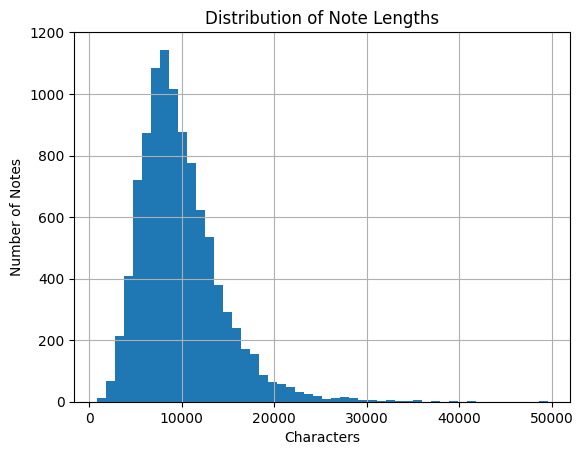

In [27]:
# Histogram
df['note_length'].hist(bins=50)
plt.title("Distribution of Note Lengths")
plt.xlabel("Characters")
plt.ylabel("Number of Notes")
plt.show()

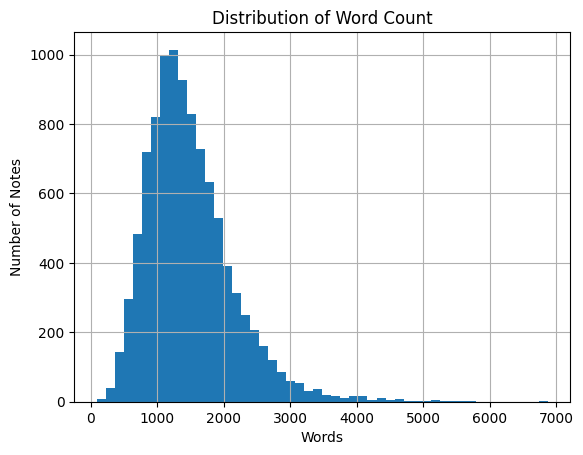

In [28]:
# Histogram
df['word_count'].hist(bins=50)
plt.title("Distribution of Word Count")
plt.xlabel("Words")
plt.ylabel("Number of Notes")
plt.show()

## 4.2 Check for duplicates

In [29]:
# check for duplicate discharge notes for the same patient (subject_id) and hospital admission (hadm_id).
df.duplicated(subset=['subject_id', 'hadm_id', 'note_text']).sum()


np.int64(0)

In [30]:
dup_df = df[df.duplicated(subset=['subject_id', 'hadm_id', 'note_text'], keep=False)]
dup_df = dup_df.sort_values(by=['subject_id', 'hadm_id'])
dup_df[['subject_id', 'hadm_id', 'note_id']].head()

,subject_id,hadm_id,note_id


In [31]:
# for (subject, hadm), group in dup_df.groupby(['subject_id', 'hadm_id']):
#     print(f"\n🔹 subject_id: {subject}, hadm_id: {hadm}, count: {len(group)}")
#     display(group)

After run the code cell above to inspect the duplicates within each group, it appears that the duplicated records correspond to different ICU stay_ids for the same patient within the same hadm_id. Most groups have two distinct stay_ids, while a few have three. 

## 4.3 Frequent words or terms

In [32]:
# Loads a list of common English stopwords (e.g., "the", "is", "and") using nltk and converts it to a set for faster lookup
# Base stopwords
stop_words = set(stopwords.words('english'))

def tokenize(text):
    # Lowercase and tokenize using regex
    tokens = re.findall(r'\b\w+\b', text.lower())
    return [word for word in tokens if word not in stop_words and word not in string.punctuation]

# .explode() flattens the list into a single column of words, one per row — so now all_words is a Series of individual words across all notes.
all_words = df['note_text'].apply(tokenize).explode() 

# Count the frequency of each word in the exploded Series using Counter, and returns the 20 most common words as a list of tuples (word, count)
Counter(all_words).most_common(20)

[('___', 525196),
 ('1', 149262),
 ('mg', 133711),
 ('2', 121694),
 ('po', 107010),
 ('0', 96493),
 ('blood', 90924),
 ('3', 90814),
 ('5', 90284),
 ('discharge', 88286),
 ('4', 82026),
 ('daily', 81538),
 ('pain', 77445),
 ('patient', 76881),
 ('tablet', 74607),
 ('history', 62092),
 ('6', 55390),
 ('8', 51084),
 ('left', 50282),
 ('7', 47457)]

'mg', 'tablet', and numbers like '1', '2' are common — expected in medication instructions. 'patient', 'discharge', 'history' are frequent medical terms in discharge summaries.
To improve quality:
1. add '__', digits ('1', '2'...), and 'mg', 'tablet' to a custom stopword list since they aren't meaningful for modeling, 
2. apply POS-aware lemmatization (reduce "patients" to "patient", "was" to "be") for better generalization and accuracy.

# 5. Text Processing (Cleaning, Tokenization and Lemmatization)

## 5.1 Advanced spaCy Batch Processing Pipeline

In [33]:
# 1. Let SpaCy do more work in C
# disable all but the tokenizer+lemmatizer
nlp = spacy.load("en_core_web_sm", disable=["parser","ner"])

# Prepare stopwords and punctuation
nltk_stopwords = set(stopwords.words('english'))
custom_stopwords = nltk_stopwords.union({'__', '___', '____', 'mg', 'tablet', 'po', 'x', 'bid', 'prn'})
punctuations = set(string.punctuation)

results = []

for doc in tqdm(nlp.pipe(df['note_text'], batch_size=200, n_process=1), total=len(df['note_text'])):
    
    # vectorized C call to get all lemmas in one shot
    lemmas_ids = doc.to_array("LEMMA")
    # filter and lowercase in bulk
    lemma_strings = [nlp.vocab.strings[lemma_id].lower() for lemma_id in lemmas_ids]
    filtered_lemmas = [lemma for lemma in lemma_strings
              if lemma.isalpha() and lemma not in custom_stopwords]
    
    results.append(filtered_lemmas)

df['advanced_spacy_lemmas'] = results

#37m 37.2s

  0%|          | 0/10000 [00:00<?, ?it/s]

In [34]:
# df['spacy_lemmas_n'] = df['spacy_lemmas'].apply(len)
df['advanced_spacy_lemmas_n'] = df['advanced_spacy_lemmas'].apply(len)

For CPU-only, single-core, full lemmatization of clinical or long texts, the speed is reasonable. Especially because:
- spaCy loads full vocab
- Lemmatization requires morphological analysis
- I'm filtering, converting to strings, lowercasing, and checking stopwords

## 5.2 Lemma-based Visualizations

### 5.2.1 Bar Plot of Most Frequent Lemmas

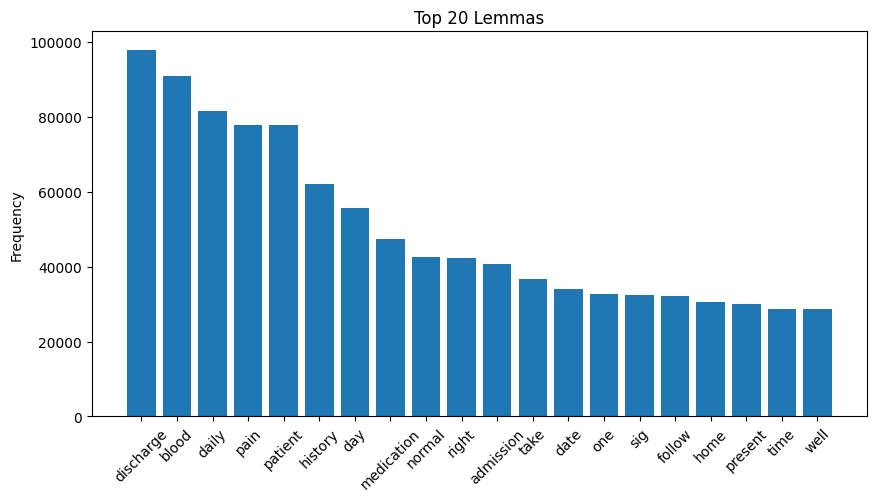

In [35]:
from collections import Counter
import matplotlib.pyplot as plt

all_lemmas = df['advanced_spacy_lemmas'].explode()  
freq = Counter(all_lemmas)
common = freq.most_common(20)

words, counts = zip(*common)
plt.figure(figsize=(10, 5))
plt.bar(words, counts)
plt.xticks(rotation=45)
plt.title("Top 20 Lemmas")
plt.ylabel("Frequency")
plt.show()


### 5.2.2 Word Cloud

In [36]:
#%pip install wordcloud

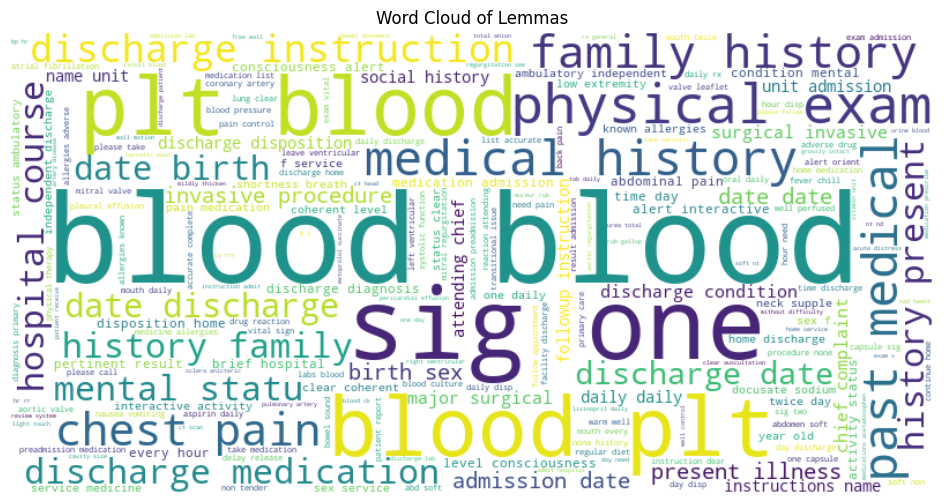

In [37]:
from wordcloud import WordCloud

text = " ".join(all_lemmas)
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of Lemmas")
plt.show()


# 6. Text Feature Extraction

## 6.1 Extract TF-IDF vectors from selected lemma column (e.g., 'advanced_spacy_lemmas')

In [38]:
# 1. Join token lists into strings (required by TfidfVectorizer)
df['lemma_text'] = df['advanced_spacy_lemmas'].apply(lambda lemmas: ' '.join(lemmas))

# 2. Initialize the TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(
    lowercase=False,   # Tokens are already cleaned
    # Out of all the tokens (or n-grams) across the entire corpus, keep only the top 1,000 most frequent ones (by TF-IDF score).
    max_features=2000, # Adjust as needed
    ngram_range=(1, 2) # Unigrams and bigrams
)

# 3. Fit and transform
X_tfidf = tfidf_vectorizer.fit_transform(df['lemma_text'])

# 4. Convert to DataFrame for inspection

tfidf = pd.DataFrame(X_tfidf.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

tfidf.shape

(10000, 2000)

In [39]:
tfidf_null = tfidf.isnull().sum()
tfidf_isnull = tfidf_null[tfidf_null > 0]
print(tfidf_isnull)

Series([], dtype: int64)


In [40]:
print('language' in tfidf.columns)

True


In [41]:
tfidf.head()

ab       abd  abd soft   abdomen  abdomen pelvis  abdomen soft  abdominal  \
0  0.0  0.000000  0.000000  0.032193             0.0      0.043599    0.00000   
1  0.0  0.000000  0.000000  0.000000             0.0      0.000000    0.02665   
2  0.0  0.037165  0.048937  0.000000             0.0      0.000000    0.00000   
3  0.0  0.018293  0.024088  0.015534             0.0      0.000000    0.00000   
4  0.0  0.000000  0.000000  0.021652             0.0      0.000000    0.00000   

   abdominal pain   ability      able  abnormal  abnormality   abscess  abuse  \
0        0.000000  0.000000  0.000000  0.000000     0.000000  0.075454    0.0   
1        0.015217  0.027713  0.015416  0.000000     0.018448  0.000000    0.0   
2        0.000000  0.000000  0.000000  0.000000     0.000000  0.000000    0.0   
3        0.000000  0.000000  0.000000  0.000000     0.000000  0.000000    0.0   
4        0.000000  0.000000  0.000000  0.035605     0.000000  0.000000    0.0   

   access  accessory  accessory muscle  accurate  accurate complete  \
0     0.0        0.0               0.0  0.021533           0.021659   
1     0.0        0.0               0.0  0.015875           0.015969   
2     0.0        0.0               0.0  0.000000           0.000000   
3     0.0        0.0               0.0  0.000000           0.000000   
4     0.0        0.0               0.0  0.028965           0.029135   

   acetaminophen  acetaminophen pain  acetaminophen sig      acid    active  \
0       0.053906            0.029738           0.000000  0.000000  0.000000   
1       0.026495            0.000000           0.000000  0.000000  0.038841   
2       0.035230            0.000000           0.061029  0.000000  0.000000   
3       0.017341            0.028699           0.000000  0.000000  0.000000   
4       0.000000            0.000000           0.000000  0.078142  0.035433   

   activity  activity status  actuation     acute  acute distress  \
0  0.013239         0.014176        0.0  0.060255        0.055428   
1  0.009760         0.010452        0.0  0.055529        0.040865   
2  0.000000         0.000000        0.0  0.000000        0.000000   
3  0.012776         0.013681        0.0  0.029075        0.000000   
4  0.017808         0.019069        0.0  0.020263        0.037279   

   acute intracranial  add  addition  additional  adequate  admission  \
0                 0.0  0.0  0.000000         0.0       0.0   0.052734   
1                 0.0  0.0  0.022878         0.0       0.0   0.054430   
2                 0.0  0.0  0.000000         0.0       0.0   0.041357   
3                 0.0  0.0  0.000000         0.0       0.0   0.030535   
4                 0.0  0.0  0.000000         0.0       0.0   0.028374   

   admission date  admission labs  admission physical  admission preadmission  \
0        0.010547        0.026289                 0.0                0.020395   
1        0.007776        0.000000                 0.0                0.015037   
2        0.020678        0.000000                 0.0                0.000000   
3        0.010178        0.000000                 0.0                0.000000   
4        0.014187        0.000000                 0.0                0.027435   

      admit  admit hospital  advance  advanced   adverse  adverse drug  \
0  0.037081             0.0      0.0  0.000000  0.020536      0.020848   
1  0.009113             0.0      0.0  0.023575  0.015140      0.015370   
2  0.024234             0.0      0.0  0.062695  0.000000      0.000000   
3  0.000000             0.0      0.0  0.000000  0.019818      0.020119   
4  0.033253             0.0      0.0  0.000000  0.000000      0.000000   

   advise  afebrile    affect  afib       age  agitation       ago       aid  \
0     0.0       0.0  0.000000   0.0  0.000000        0.0  0.000000  0.000000   
1     0.0       0.0  0.000000   0.0  0.018341        0.0  0.000000  0.045025   
2     0.0       0.0  0.000000   0.0  0.000000        0.0  0.000000  0.000000   
3     0.0       0.0  0

## 6.2 Transformer-Based Word Embedding (ClinicalBERT)

In [42]:
# --- Make the project root importable ---------------------------------
import sys, pathlib

package_parent = pathlib.Path.cwd().parents[1]          # two levels up from notebooks/
if str(package_parent) not in sys.path:             # keep sys.path tidy
    sys.path.insert(0, str(package_parent))

In [43]:
# Assume df already has a "lemmas" column
from Mimic_Readmit_Clinbert.utils.embeddings import add_clinbert_embeddings

clinbert = add_clinbert_embeddings(df, text_col="advanced_spacy_lemmas", batch_size=32)
print(clinbert.shape)  # original cols + 768 embedding cols

#56m 25.4s

ClinicalBERT:   0%|          | 0/10000 [00:00<?, ?it/s]

(10000, 768)


visualize ClinicalBERT (or any BERT) embeddings using t-SNE or UMAP

In [44]:
# %pip install transformers umap-learn 

In [45]:
# from transformers import AutoTokenizer, AutoModel
# from sklearn.manifold import TSNE
# import umap

# # ─────────────── 1. Load ClinicalBERT Model ───────────────
# MODEL_NAME = "emilyalsentzer/Bio_ClinicalBERT"
# tokenizer = AutoTokenizer.from_pretrained(MODEL_NAME)
# model = AutoModel.from_pretrained(MODEL_NAME)
# model.eval().cpu()  # use .cuda() if GPU

# # ─────────────── 2. Define BERT Embedding Function ───────────────
# @torch.no_grad()
# def get_cls_embeddings(texts, max_len=128):
#     """Return CLS token embeddings from BERT for a list of texts."""
#     inputs = tokenizer(
#         texts, 
#         padding=True, 
#         truncation=True, 
#         max_length=max_len, 
#         return_tensors="pt"
#     )
#     inputs = {k: v.cuda() for k, v in inputs.items()}  # remove if using CPU
#     outputs = model(**inputs)
#     cls_embeddings = outputs.last_hidden_state[:, 0, :]  # CLS token
#     return cls_embeddings.cpu().numpy()

# # ─────────────── 3. Sample & Embed Text ───────────────
# # Convert lemmas into strings (if not already)
# df["lemmas_str"] = df["lemmas"].apply(lambda x: " ".join(x) if isinstance(x, list) else x)
# df_sample = df.sample(n=500, random_state=42)  # keep it small for t-SNE

# texts = df_sample["lemmas_str"].tolist()
# labels = df_sample["readmit_30days"].tolist()

# embeddings = get_cls_embeddings(texts)

# # ─────────────── 4A. t-SNE ───────────────
# tsne = TSNE(n_components=2, perplexity=30, random_state=42)
# X_tsne = tsne.fit_transform(embeddings)

# plt.figure(figsize=(8, 6))
# sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=labels, palette=["skyblue", "salmon"])
# plt.title("t-SNE of ClinicalBERT Embeddings")
# plt.xlabel("Component 1")
# plt.ylabel("Component 2")
# plt.legend(title="Readmitted")
# plt.grid(True)
# plt.tight_layout()
# plt.show()

# # ─────────────── 4B. UMAP ───────────────
# reducer = umap.UMAP(n_neighbors=15, min_dist=0.1, metric='cosine', random_state=42)
# X_umap = reducer.fit_transform(embeddings)

# plt.figure(figsize=(8, 6))
# sns.scatterplot(x=X_umap[:, 0], y=X_umap[:, 1], hue=labels, palette=["skyblue", "salmon"])
# plt.title("UMAP of ClinicalBERT Embeddings")
# plt.xlabel("UMAP-1")
# plt.ylabel("UMAP-2")
# plt.legend(title="Readmitted")
# plt.grid(True)
# plt.tight_layout()
# plt.show()


# 7. New datasets defination

In [46]:
# Before concat
tfidf_pref = tfidf.copy()
tfidf_pref.columns = [f"tfidf__{c}" for c in tfidf_pref.columns]

# Merge TF-IDF Features to Structured Data
tfidf_str = pd.concat([df.reset_index(drop=True), tfidf_pref.reset_index(drop=True)], axis=1)

In [47]:
# Merge ClinicalBERT embedding to Structured Data
clinbert_str = pd.concat([df.reset_index(drop=True), clinbert.reset_index(drop=True)], axis=1)

In [48]:
# Merge fuse structured variables + TF-IDF features + transformer embeddings
tfidf_clinbert_str = pd.concat([tfidf_str.reset_index(drop=True), clinbert.reset_index(drop=True)], axis=1)

Only keep the same columns as that of my first modeling effort.

In [49]:
print('word_count' in df.columns)

True


In [50]:
# keep list from the structured DF
cols_selected_1 = [
    "subject_id","hadm_id","admittime","dischtime", "note_id","note_text", 
    "admit_to_disch", "admit_to_disch_hours", "next_admittime",
    "days_to_next_admit","readmit_30days", 'note_length', 'word_count', 
    'advanced_spacy_lemmas_n'
]
cols_selected_2 = ['icu_stay_count', 'total_icu_hours', 'time_to_first_icu_hours', 'last_icu_to_discharge_hours']

# de-dupe while preserving order
cols_selected = list(dict.fromkeys(cols_selected_1 + cols_selected_2))

# columns from each source
struct_keep   = [c for c in cols_selected if c in tfidf_clinbert_str.columns]
tfidf_cols    = list(tfidf_pref.columns)
clinbert_cols = list(clinbert.columns)

# build final column list (dedupe while preserving order)
from collections import OrderedDict
tfidf_strkept_cols = list(OrderedDict.fromkeys(struct_keep + tfidf_cols))
clinbert_strkept_cols = list(OrderedDict.fromkeys(struct_keep + clinbert_cols))
tfidf_clinbert_strkept_cols = list(OrderedDict.fromkeys(struct_keep + tfidf_cols + clinbert_cols))

# new dataframe
tfidf_strkept = tfidf_clinbert_str.loc[:, tfidf_strkept_cols].copy()
clinbert_strkept = tfidf_clinbert_str.loc[:, clinbert_strkept_cols].copy()
tfidfbert_strkept = tfidf_clinbert_str.loc[:, tfidf_clinbert_strkept_cols].copy()

# (optional) see which structured columns were dropped
dropped_struct = [c for c in df.columns if c not in struct_keep]
print("df shape:",df.shape)
print("Dropped structured cols number:", len(dropped_struct))
print("Kept structured cols number:", len(cols_selected))
print('\n')
print("tfidf cols number:", len(tfidf_cols))
print("clinbert cols number:", len(clinbert_cols))
print('\n')
print("tfidf_strkept cols number:", len(tfidf_strkept_cols))
print("tfidf_strkept shape:",tfidf_strkept.shape)
print('\n')
print("clinbert_strkept cols number:", len(clinbert_strkept_cols))
print("clinbert_strkept shape:",clinbert_strkept.shape)
print('\n')
print("tfidf_clinbert_strkept cols number:", len(tfidf_clinbert_strkept_cols))
print("tfidf_clinbert_strkept shape:",tfidfbert_strkept.shape)
print('\n')
print("tfidf_str shape:",tfidf_str.shape)
print("clinbert_str shape:",clinbert_str.shape)
print("tfidf_clinbert_str shape:",tfidf_clinbert_str.shape)

df shape: (10000, 150)
Dropped structured cols number: 132
Kept structured cols number: 18


tfidf cols number: 2000
clinbert cols number: 768


tfidf_strkept cols number: 2018
tfidf_strkept shape: (10000, 2018)


clinbert_strkept cols number: 786
clinbert_strkept shape: (10000, 786)


tfidf_clinbert_strkept cols number: 2786
tfidf_clinbert_strkept shape: (10000, 2786)


tfidf_str shape: (10000, 2150)
clinbert_str shape: (10000, 918)
tfidf_clinbert_str shape: (10000, 2918)


In [ ]:
print()

# 7. Save Dataset and Variables

Save df DataFrame into csv file

In [51]:
from pathlib import Path

root_dir = Path.cwd().parent          # notebooks → mimic_readmit_clinbert
data_dir = root_dir / "data"
data_dir.mkdir(exist_ok=True)         # create folder if missing

df.to_csv               (data_dir / "cleaned_lemmas_2.csv",    index=False)  # Structured data 
tfidf.to_csv         (data_dir / "tfidf_2.csv",             index=False)   # tfidf only
clinbert.to_csv      (data_dir / "clinbert_2.csv",       index=False)   # clinbert only

tfidf_str.to_csv   (data_dir / "tfidf_str_2.csv",    index=False)   # tfidf + structured data
clinbert_str.to_csv(data_dir / "clinbert_str_2.csv", index=False)   # clinbert + structured data
tfidf_clinbert_str.to_csv   (data_dir / "tfidf_clinbert_str_2.csv",    index=False)   # tfidf + clinbert + structured data

tfidf_strkept.to_csv   (data_dir / "tfidf_strkept_2.csv",    index=False)   # tfidf + seleted cols in Structured data
clinbert_strkept.to_csv(data_dir / "clinbert_strkept_2.csv", index=False)   # clinbert + seleted cols in Structured data
tfidfbert_strkept.to_csv   (data_dir / "tfidf_clinbert_strkept_2.csv",    index=False)  # tfidf + clinbert + seleted cols in Structured data

Structured EHR variables, TF-IDF on raw or lemmatised notes, and ClinicalBERT CLS/pooled embeddings, the three channels emphasise different statistical signals, stacking them side-by-side (early fusion) or training separate models and ensemble-combining outputs (late fusion) often yields small-to-moderate AUC gains in clinical-NLP papers.

Save only selected important variables

In [52]:
EDA_session = {
    'df': df,                        
    'tfidf': tfidf,
    'clinbert':clinbert,

    'tfidf_str': tfidf_str, 
    'tfidf_vectorizer': tfidf_vectorizer,
    'clinbert_str': clinbert_str,
    'tfidf_clinbert_str':tfidf_clinbert_str,

    "tfidf_strkept": tfidf_strkept,
    "clinbert_strkept": clinbert_strkept,
    "tfidfbert_strkept": tfidfbert_strkept,

}

joblib.dump(EDA_session, data_dir/'EDA_session_2.joblib')

['c:\\Users\\Sheng Miao\\OneDrive\\桌面\\DS\\Capstone projects\\Mimic_Readmit_Clinbert\\data\\EDA_session_2.joblib']

Resuming work

In [53]:
# root_dir = Path.cwd().parent          # notebooks → mimic_readmit_clinbert
# data_dir = root_dir / "data"
# data_dir.mkdir(exist_ok=True)         # create folder if missing

# session_data = joblib.load(data_dir/"EDA_session_2.joblib")
# _ = session_data['_']